<a href="https://colab.research.google.com/github/HeewonChung92/BAMI_Lecture/blob/master/IRIS_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the XGBoost: 

In [ ]:
pip install xgboost

Import the libraray: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 8)   # 보여지는 차트 크기를 크게 보여줌 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Load the dataset from sklearn:
0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [ ]:
iris = datasets.load_iris()
data_input = iris.data
data_label = iris.target
data_features = ['0-Setosa', '1-Versicolor', '2-Virginica']
print('Iris data: ', data_input.shape, iris.feature_names)
print('클래스 레이블:', np.unique(data_label))

Iris data:  (150, 4) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스 레이블: [0 1 2]


Split the data into train and test sets with 70%-30% split: 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_input, data_label, test_size=0.3, random_state=42, stratify=data_label)
print('y의 레이블 카운트:', np.bincount(data_label))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


Standardize features by removing the mean and scaling to unit variance:   
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Train the model (This will take a few minutes to run):   
https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn 

In [ ]:
model_xgb = XGBClassifier(
    objective='binary:logistic', # error evaluation for multiclass training
    max_depth=4, # the maximum depth of each tree 
    learning_rate=0.2, # the boosting learning rate 
    n_estimators=150, # the number of gradient boosted trees 
    # reg_lambda=1, 
    # subsample=0.9, 
    # colsample_bytree=0.9
)
model_xgb.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Plot feature importance as a bar based on fitted model. 

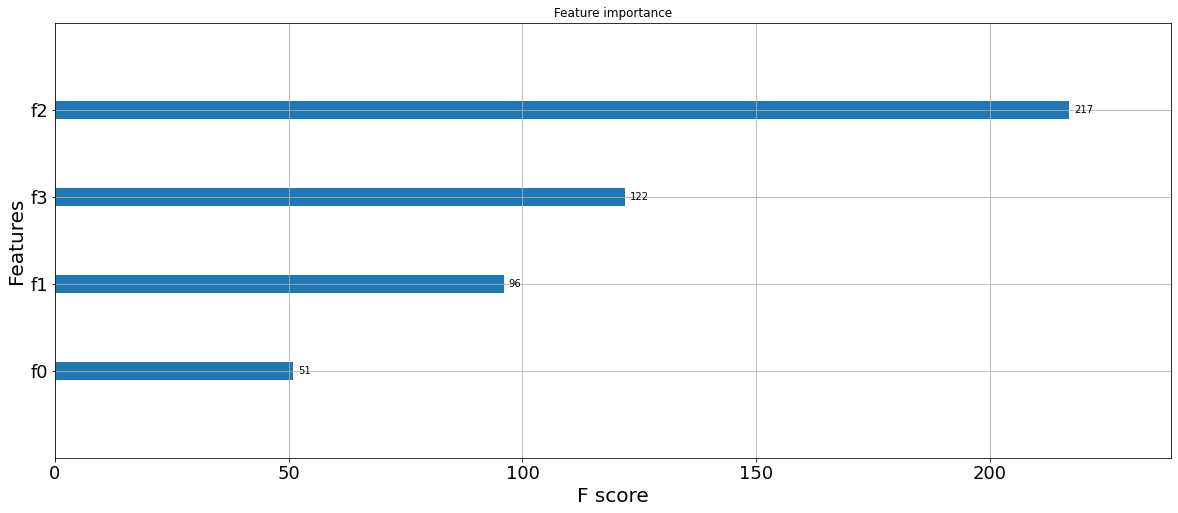

In [ ]:
plot_importance(model_xgb, max_num_features=4)
plt.show()

Get predictions on the test set and print the accuracy score: 

In [ ]:
test_predict = model_xgb.predict_proba(X_test_std)
test_best = np.argmax(test_predict, axis=1)
print('Label: ', y_test)
print('Predict: ', test_best)

test_acc = accuracy_score(y_test, test_best)
print('Accuracy: ', test_acc)

Label:  [2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]
Predict:  [2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 1 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]
Accuracy:  0.9333333333333333


Plot the confusion matrix:    
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

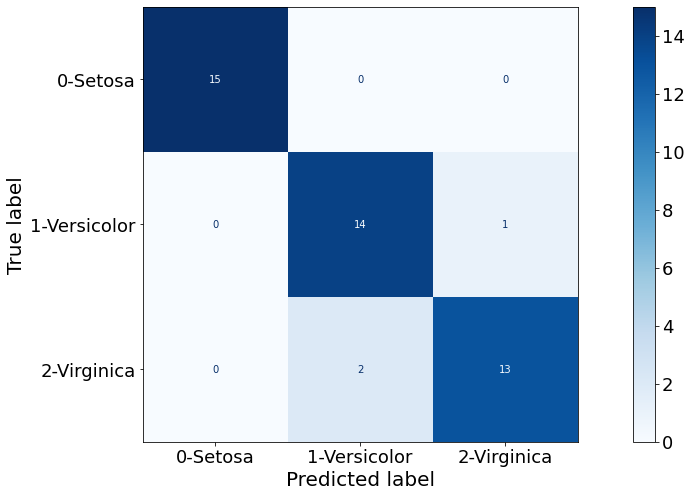

In [ ]:
# cfs_mtx = confusion_matrix(y_test, test_best, labels=[0, 1, 2])
# print('Confusion Matrix: ')
# print(cfs_mtx)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_xgb, X_test_std, y_test, display_labels=data_features, cmap=plt.cm.Blues)